# DWC Profile and Coordinate Cross-check

This example shows how to quickly extrackt MIP spectra for muon runs in a given HGC layer.

First, we do the necessary imports. [Pandas](https://pandas.pydata.org/) for managing data, [NumPy](http://www.numpy.org/) for numerical operations, and [matplotlib](https://matplotlib.org/) to show plots:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Also, we should import the [HGC testbeam package](https://llrgit.in2p3.fr/rembser/hgc-testbeam-mini-stage/tree/master/python-package) to load data the test beam data very easily:

In [2]:
import hgc_testbeam as hgc

Read in the HGC and DWC (Delay Wire Chamber) data for a muon run:

In [3]:
df_hgc = hgc.load_run(700, columns=["event", "rechit_detid", "rechit_amplitudeHigh", "rechit_layer", "rechit_y"])
df_hgc.event = df_hgc.event.astype(np.uint64)
df_hgc.dtypes
df_hgc = df_hgc.set_index(["event", "rechit_detid"])
df_dwc = hgc.load_run(700, key="trackimpactntupler/impactPoints",
                      columns=["event", "dwcReferenceType", "impactX_HGCal_layer_2", "impactY_HGCal_layer_2"]
                     ).set_index("event")
df = df_hgc.join(df_dwc, how="inner", lsuffix="_hgc", rsuffix="_dwc")

We want to select only the best track measurements where all DWCs were contributing:

In [4]:
df_sel_1 = df.query("dwcReferenceType == 15")

Check if the profile looks like we would expect from a beam spot:

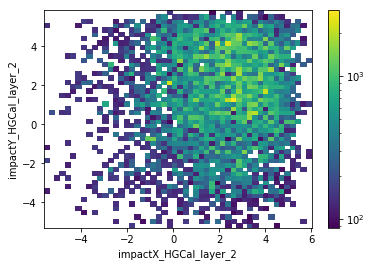

In [5]:
plt.hist2d(df_sel_1.impactX_HGCal_layer_2, df_sel_1.impactY_HGCal_layer_2, bins=50, norm=LogNorm())
plt.xlabel("impactX_HGCal_layer_2")
plt.ylabel("impactY_HGCal_layer_2")
plt.colorbar()
plt.show()

Next we want to look at the correlation between DWC and HGC measurements in layer 2. We restrict our selection even further this time and only look at well-measured HGC hits:

In [6]:
df_sel_2 = df.query("dwcReferenceType == 15 and rechit_amplitudeHigh > 30 and rechit_layer == 2")

Plot the y-position of the DWC track extrapolated to the HGCY layer 2 versus the actual y-position of the HGC rechit in layer 2 above a certain threshold in amplitude.

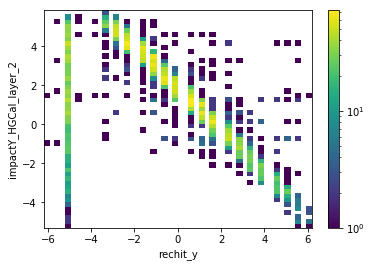

In [7]:
plt.hist2d(df_sel_2.rechit_y, df_sel_2.impactY_HGCal_layer_2, bins=50, norm=LogNorm())
plt.xlabel("rechit_y")
plt.ylabel("impactY_HGCal_layer_2")
plt.colorbar()
plt.show()

We see the measurements are well correlated, even if the sign is not the same and the values are shifted. It is however unclear to me where this population at `rechit_y` around -5 cm comes from.